In [1]:
%%writefile requirements.txt
fastapi
uvicorn
joblib
python-multipart
pyngrok

Overwriting requirements.txt


In [2]:
!pip install -r requirements.txt

In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix,roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import resample
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Loading the dataset
df = pd.read_csv("carclaims.csv")
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [5]:
df.shape

(15420, 33)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [7]:
# checking for any missing values
df.isna().sum()

Month                   0
WeekOfMonth             0
DayOfWeek               0
Make                    0
AccidentArea            0
DayOfWeekClaimed        0
MonthClaimed            0
WeekOfMonthClaimed      0
Sex                     0
MaritalStatus           0
Age                     0
Fault                   0
PolicyType              0
VehicleCategory         0
VehiclePrice            0
PolicyNumber            0
RepNumber               0
Deductible              0
DriverRating            0
Days:Policy-Accident    0
Days:Policy-Claim       0
PastNumberOfClaims      0
AgeOfVehicle            0
AgeOfPolicyHolder       0
PoliceReportFiled       0
WitnessPresent          0
AgentType               0
NumberOfSuppliments     0
AddressChange-Claim     0
NumberOfCars            0
Year                    0
BasePolicy              0
FraudFound              0
dtype: int64

# Data Visualization

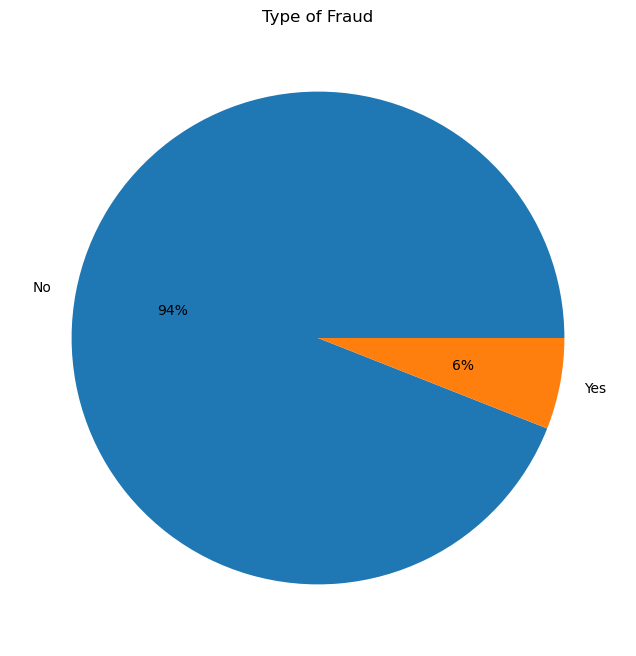

In [8]:
#create pie chart for some va
plt.figure(figsize=(10,8))
plt.pie(df.FraudFound.value_counts().values,labels=df.FraudFound.value_counts().index,  autopct='%.0f%%')
plt.title("Type of Fraud")
plt.show()

> From the pie chart we can coclude that only 6% of the claims were fraudulent. Being the target feature of the study I can say the dataset is imbalanced

In [9]:
# Replace the labels to 0 and 1 to represent legit and fraud respectively
df.loc[df['FraudFound'] == 'No','FraudFound'] = 0
df.loc[df['FraudFound'] == 'Yes','FraudFound'] = 1

df['FraudFound'] = df['FraudFound'].astype(int)
df.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,0
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,0
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,0
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,0
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,0


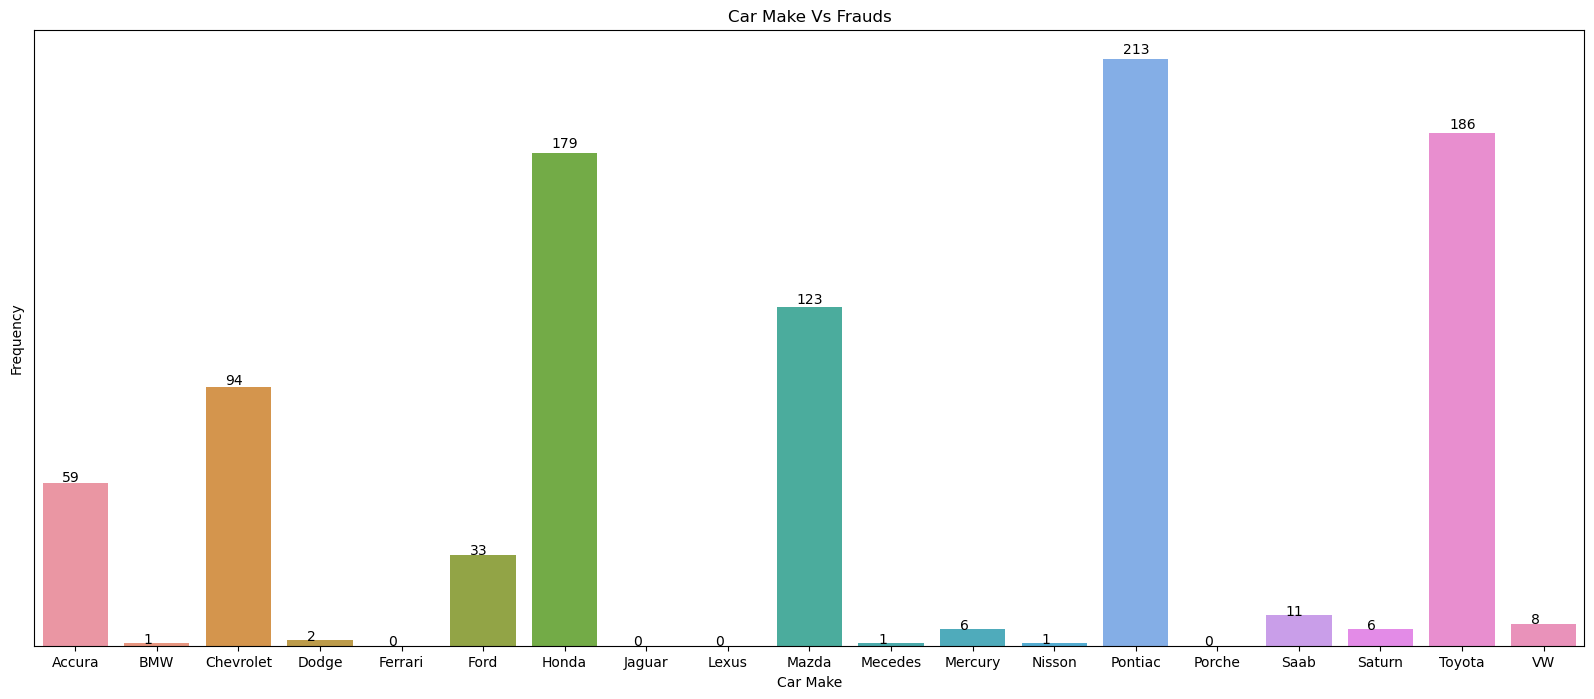

In [10]:
make = df.groupby('Make')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Car Make Vs Frauds")

ax = sns.barplot(x=make.index,y=make.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Car Make")
plt.ylabel("Frequency");
plt.yticks([])
plt.show()


> Most of the fraud cases were associated with Pontiac and none found in Ferrari, Jguar, Lexus and Porche. We will come to realize reasons relating to the statistics above in the course3 of the project.


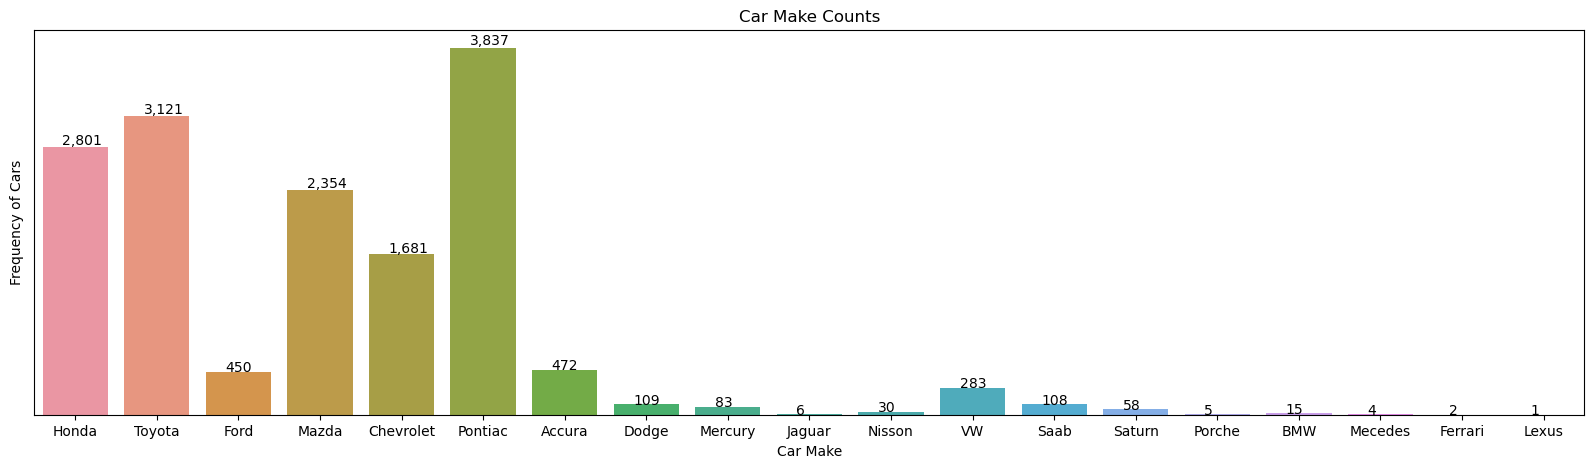

In [11]:
plt.figure(figsize=(20,5))
ax = sns.countplot(x=df['Make'])
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Car Make")
plt.ylabel("Frequency of Cars");
plt.yticks([])
plt.title('Car Make Counts')
plt.show()

> The number of cars involved in accidets shows why Jaguar,Lexus,Porche and Ferrari have no such claims and Pontiac having high claims.

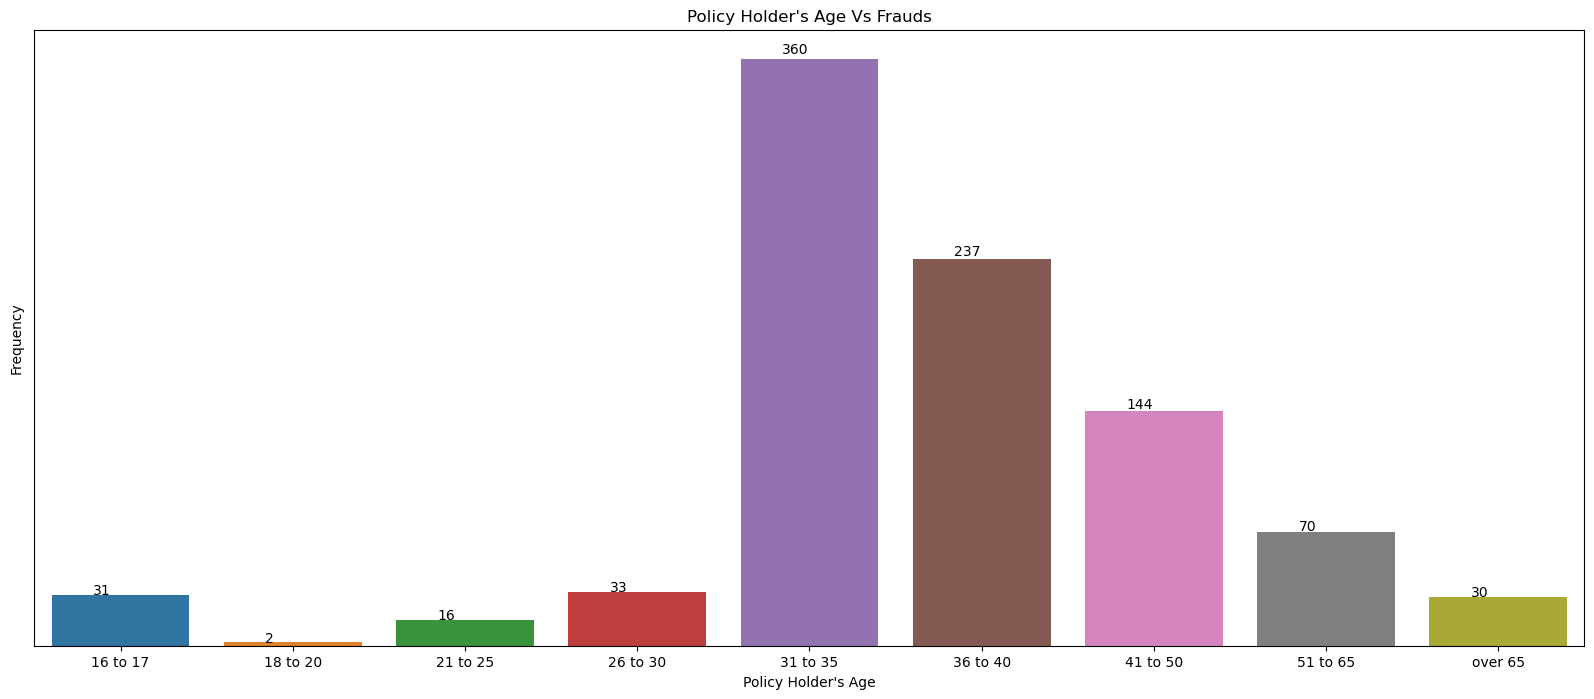

In [12]:
policyAge = df.groupby('AgeOfPolicyHolder')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Policy Holder's Age Vs Frauds")

ax = sns.barplot(x=policyAge.index,y=policyAge.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.xlabel("Policy Holder's Age")
plt.ylabel("Frequency");
plt.yticks([])
plt.show()

> Most of the fraud cases are seen with ages between 31 to 35 and least between ages 18 to 20

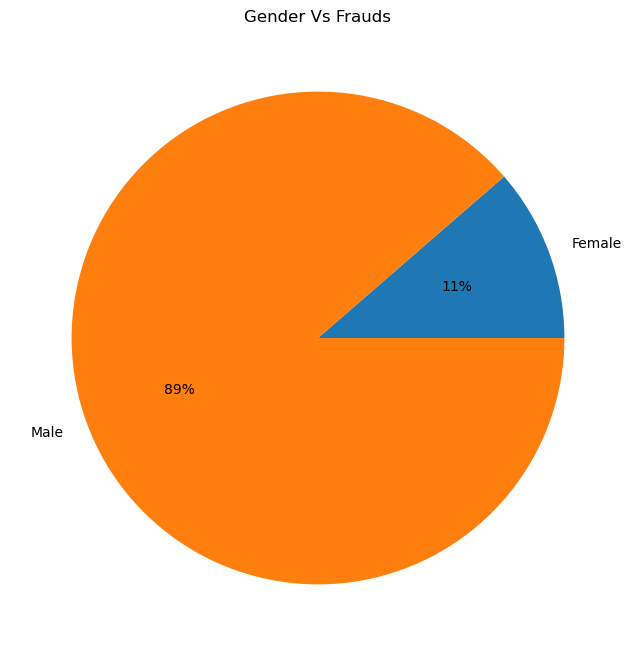

In [13]:
gender = df.groupby('Sex')['FraudFound'].sum()
plt.figure(figsize=(10,8))
plt.title("Gender Vs Frauds")

plt.pie(gender.values,labels=gender.index,  autopct='%.0f%%')

plt.show()

> most males are engaged in fraudulent claims(89%) as compared to their female counterparts(11%)

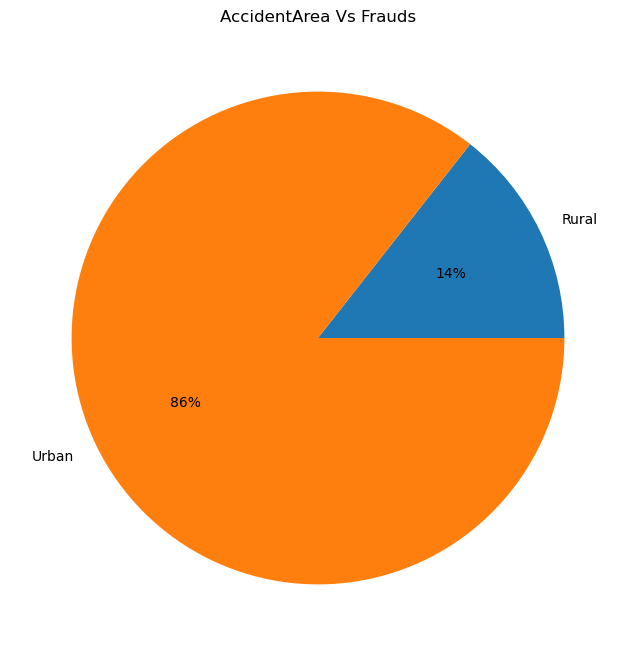

In [14]:
accidentArea = df.groupby('AccidentArea')['FraudFound'].sum()

plt.figure(figsize=(10,8))
plt.title("AccidentArea Vs Frauds")

plt.pie(accidentArea.values,labels=accidentArea.index,  autopct='%.0f%%')

plt.show()

> There are more accidents in the urbans as compared to the rurals. This can be as a result of the congestion in urban areas and busy highways.

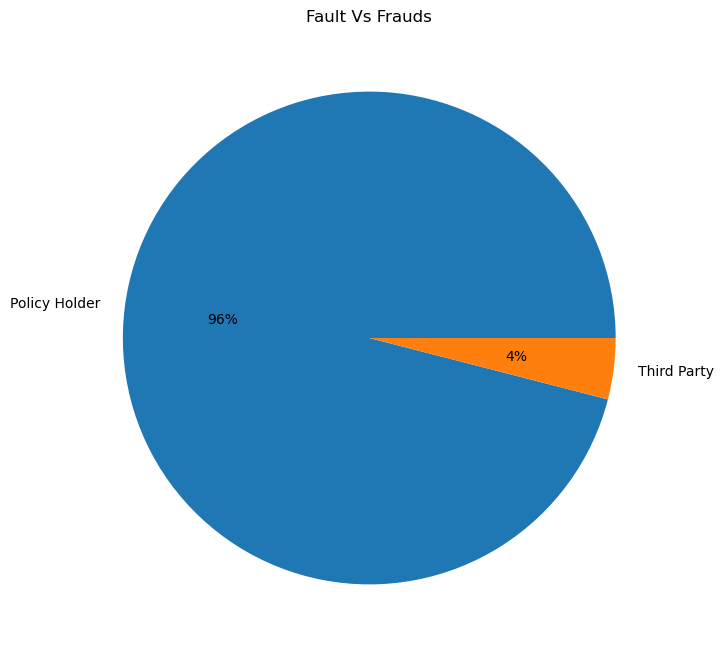

In [15]:
fault = df.groupby('Fault')['FraudFound'].sum()

plt.figure(figsize=(10,8))
plt.title("Fault Vs Frauds")
plt.pie(fault.values,labels=fault.index,  autopct='%.0f%%')
plt.show()

> Evidently, most accidents occur as a result of the policy holder doing than third party doings.

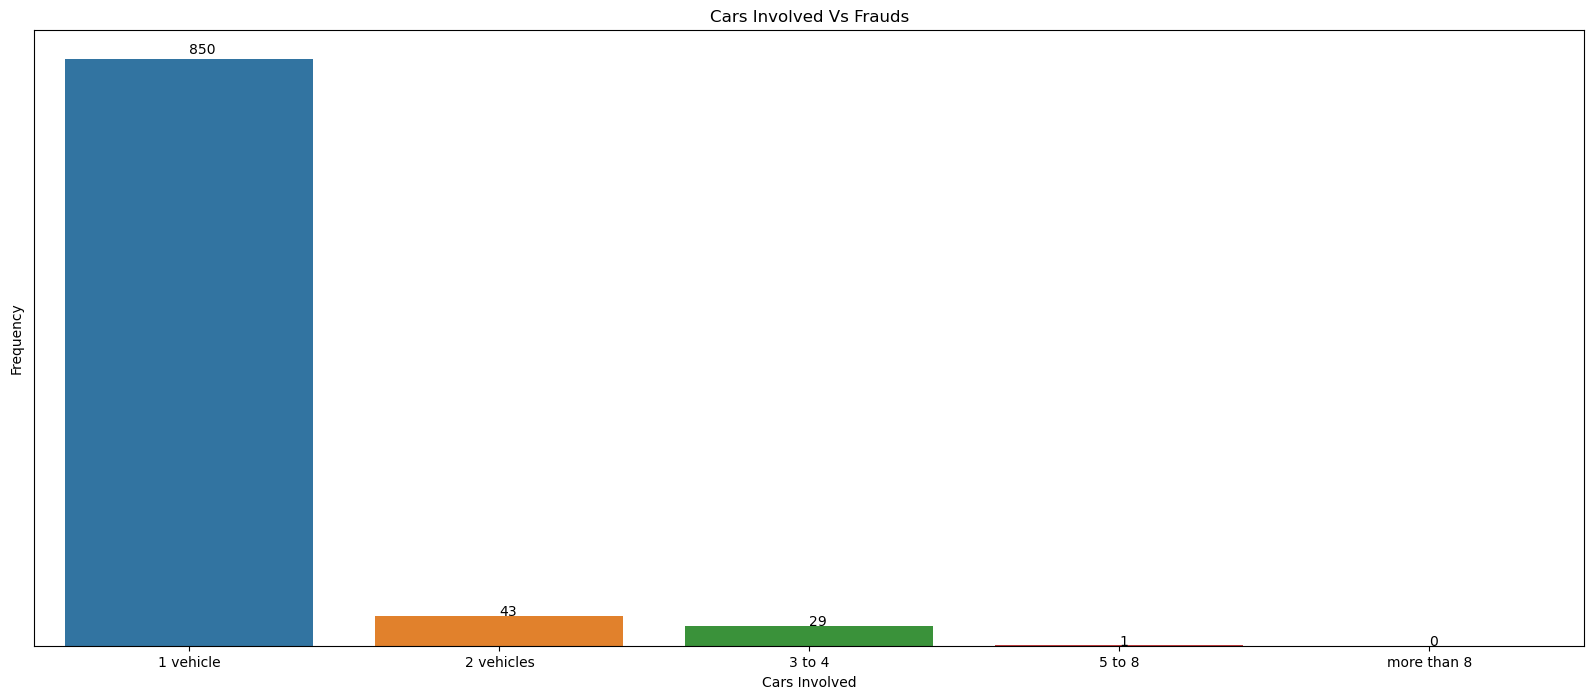

In [16]:
cars = df.groupby('NumberOfCars')['FraudFound'].sum()
plt.figure(figsize=(20,8))
plt.title("Cars Involved Vs Frauds")

ax = sns.barplot(x=cars.index,y=cars.values)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.4, p.get_height()*1.01))
plt.xlabel("Cars Involved")
plt.ylabel("Frequency");
plt.yticks([])
plt.show()

> Fraudulent claims are likely to occur when only asingle vehicle is involved

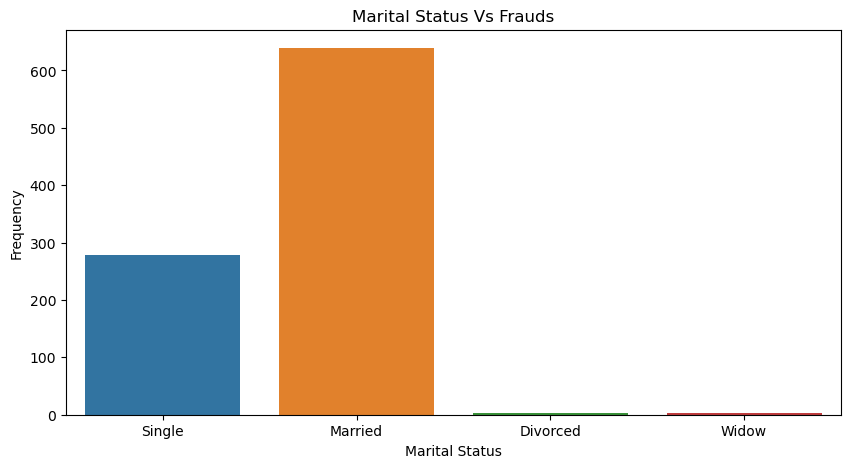

In [17]:
fraud = df[df['FraudFound'] == 1]
plt.figure(figsize=(10,5))
plt.title("Marital Status Vs Frauds")
sns.countplot(x=fraud['MaritalStatus']);
plt.xlabel("Marital Status")
plt.ylabel("Frequency");

> The married are involved in more fraud than any other category of the marital status.

In [18]:
le = LabelEncoder()

cols = df.select_dtypes('O').columns

df[cols]= df[cols].apply(le.fit_transform)
df['Year'] = le.fit_transform(df.Year)

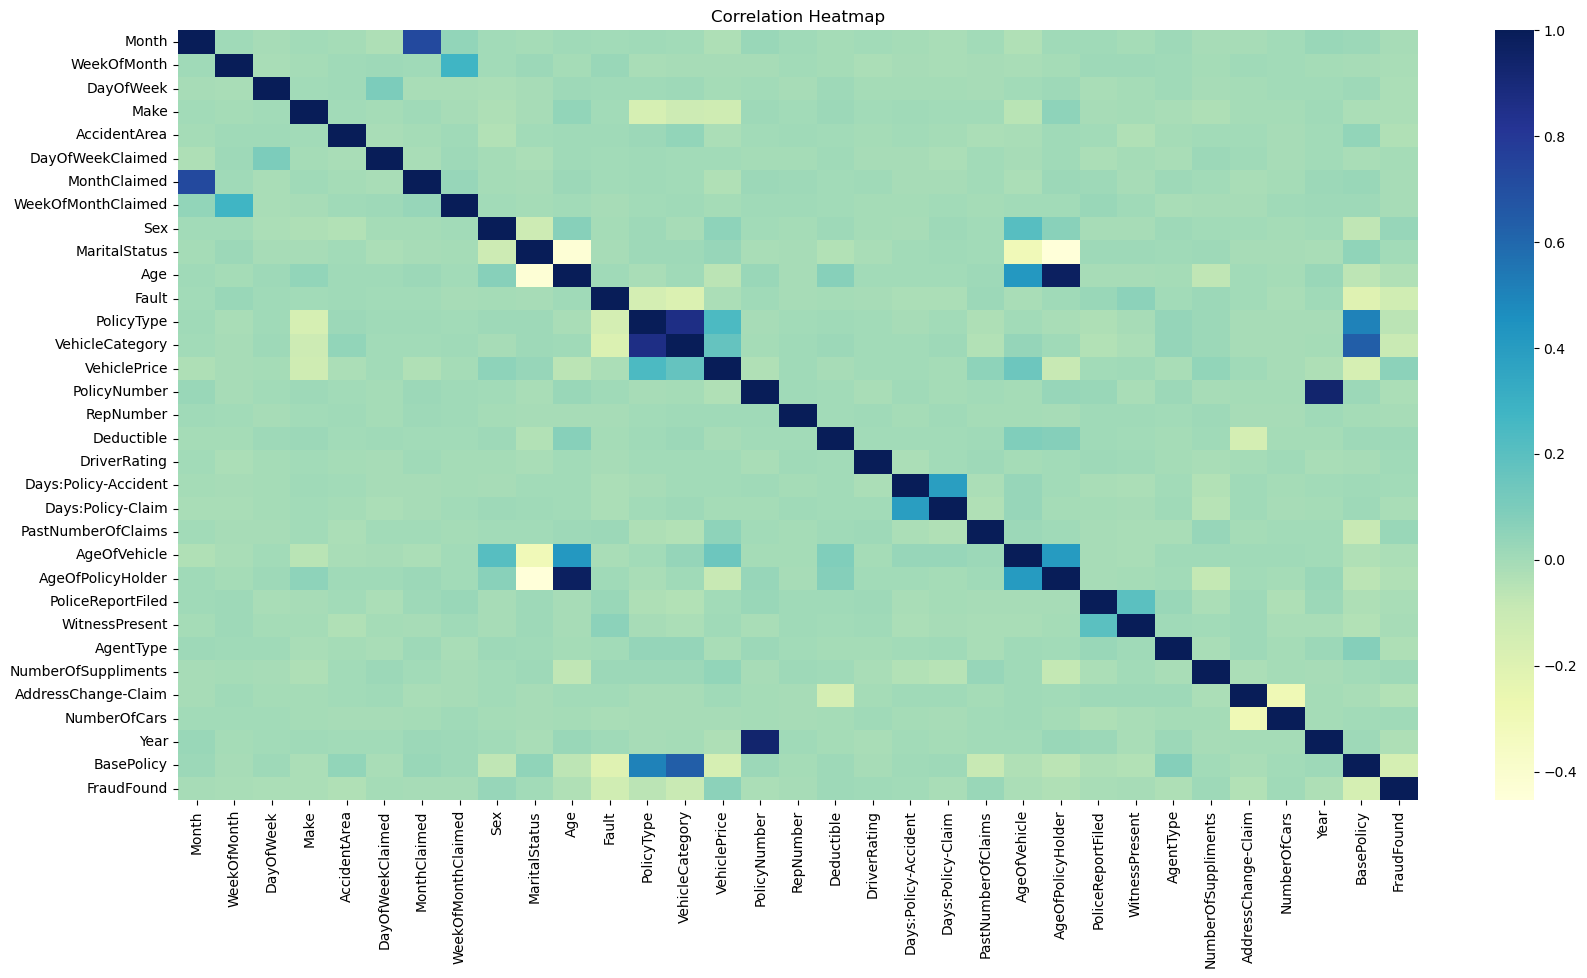

In [19]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

> There is a strong correlation between some features. We can retain or remove them but in this case I will select some specific features and develop a different correlation matrix.

In [20]:
df_sel = df[['Make', 'AccidentArea','Sex',\
       'MaritalStatus','Fault', 'VehicleCategory',\
       'VehiclePrice', 'Year',\
       'DriverRating', 'Days:Policy-Accident', 'Days:Policy-Claim',\
       'PastNumberOfClaims', 'AgeOfVehicle', 'AgeOfPolicyHolder',\
       'PoliceReportFiled', 'WitnessPresent', 'AgentType',\
       'NumberOfSuppliments', 'AddressChange-Claim', 'NumberOfCars',\
       'BasePolicy', 'FraudFound']]

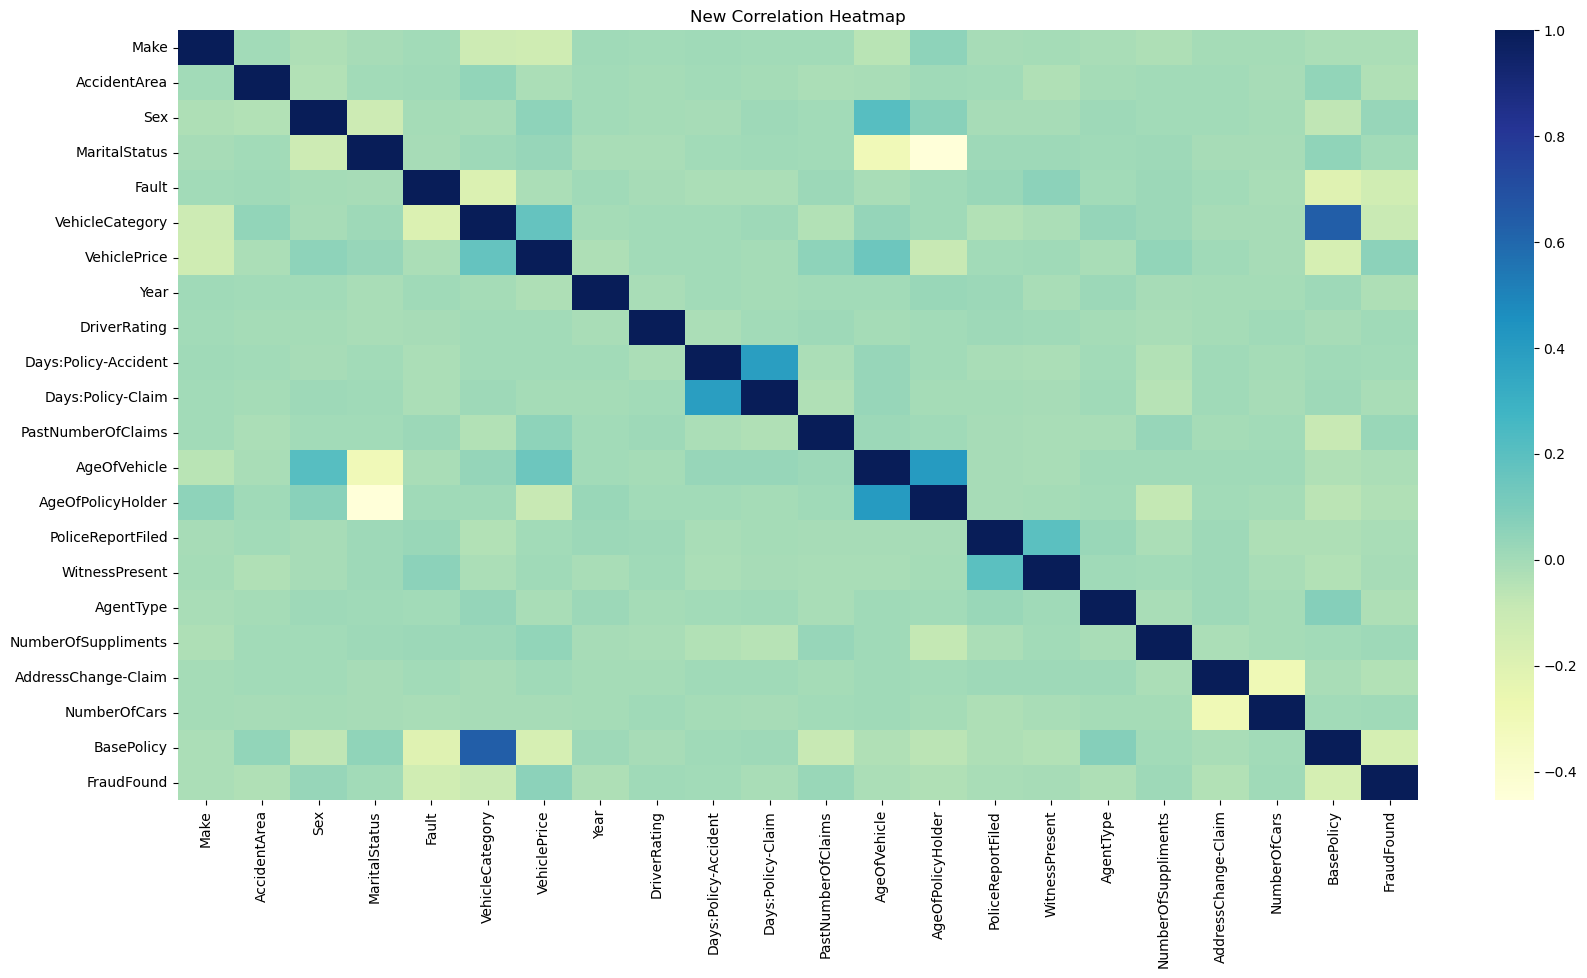

In [21]:
plt.figure(figsize=(20,10))
sns.heatmap(df_sel.corr(),cmap="YlGnBu")
plt.title("New Correlation Heatmap")
plt.show()

> There is still a strong correlation between BasePolicy and VehicleCategory but we will ignore it for now

## Performance metrics using the confusion matrix

In [22]:
def conf_matrix(y_test,y_pred):
    con_matrix = confusion_matrix(y_test,y_pred)
    con_matrix = pd.DataFrame(con_matrix,range(2),range(2))
    
    plt.figure(figsize=(5,5))
    plt.title("Confusion Matrix")
    sns.heatmap(con_matrix,annot=True,cbar=False,fmt='g')

# Data Modelling

In [23]:
X = df_sel.drop('FraudFound',axis=1)
y = df_sel[['FraudFound']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((11565, 21), (3855, 21), (11565, 1), (3855, 1))

## Logistic Regression

Accuracy of thie model:		 0.9398184176394293


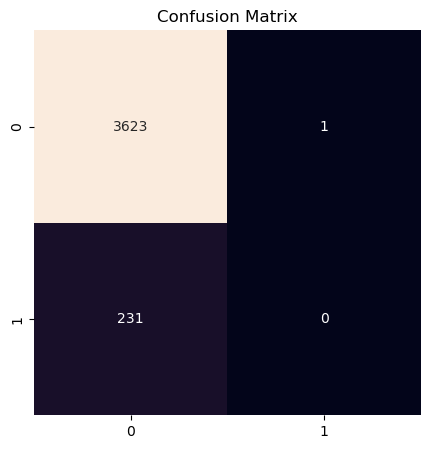

In [24]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)

acc_lr=accuracy_score(y_test, lr_pred)
print("Accuracy of thie model:\t\t",acc_lr)
conf_matrix(y_test,lr_pred)

## Random Forest Classifier (rfc)

Accuracy of thie model:		 0.9385214007782101


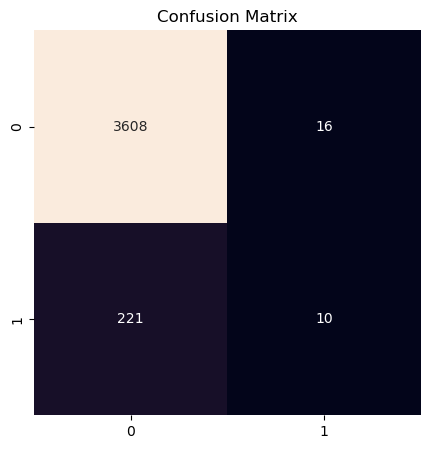

In [25]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

acc_rfc=accuracy_score(y_test, rfc_pred)
print("Accuracy of thie model:\t\t",acc_rfc)
conf_matrix(y_test,rfc_pred)

> The dataset is very imbalanced thus will not give accurate information. To overcome this we an use of one of the two ways:

        1. Upscale the Minority Class    (FraudFound ==1) in this case
        2. Downsample the Majority Class (FraudFound ==0) in this case

## 1. Upscale the Minority Class

In [26]:
n = df_sel.FraudFound.value_counts()[0]

df_maj = df_sel[df_sel.FraudFound==0]
df_min = df_sel[df_sel.FraudFound==1]

df_minority_upsampled = resample(df_min,replace=True,n_samples = n,random_state=42)

df_upsampled = pd.concat([df_maj,df_minority_upsampled])
df_upsampled.FraudFound.value_counts()

0    14497
1    14497
Name: FraudFound, dtype: int64

In [27]:
X = df_upsampled.drop('FraudFound',axis=1)
y = df_upsampled[['FraudFound']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((21745, 21), (7249, 21), (21745, 1), (7249, 1))

### Logistic Regression

Accuracy of thie model:		 0.7417574837908677


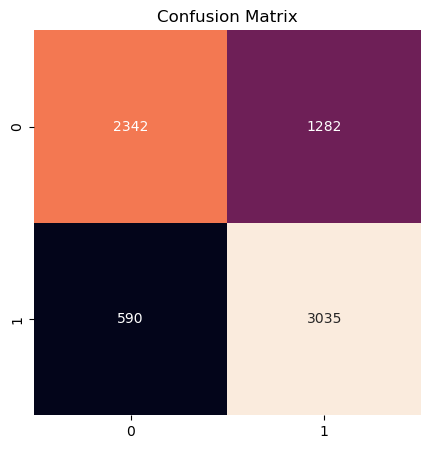

In [28]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_upscale_pred = lr.predict(X_test)

acc_lr_upscale=accuracy_score(y_test, lr_upscale_pred)
print("Accuracy of thie model:\t\t",acc_lr_upscale)
conf_matrix(y_test,lr_upscale_pred)

### RandomForest Classifier

Accuracy of thie model:		 0.9864808939164023


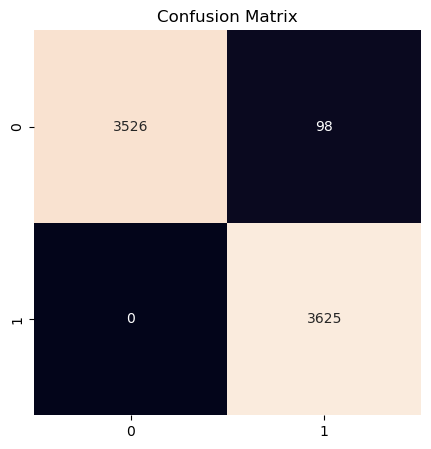

In [29]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_upscale_pred = rfc.predict(X_test)

acc_rfc_upscale=accuracy_score(y_test, rfc_upscale_pred)
print("Accuracy of thie model:\t\t",acc_rfc_upscale)
conf_matrix(y_test,rfc_upscale_pred)

## 2. Downsample Majority Class

In [30]:
n = df_sel.FraudFound.value_counts()[1]

df_maj = df_sel[df_sel.FraudFound==0]
df_min = df_sel[df_sel.FraudFound==1]

df_majority_downsampled = resample(df_maj,replace=False,n_samples = n,random_state=42)

df_downsampled = pd.concat([df_min,df_majority_downsampled])
df_downsampled.FraudFound.value_counts()

1    923
0    923
Name: FraudFound, dtype: int64

In [31]:
X = df_downsampled.drop('FraudFound',axis=1)
y = df_downsampled[['FraudFound']]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1384, 21), (462, 21), (1384, 1), (462, 1))

### Logistic Regression

Accuracy of thie model:		 0.7662337662337663


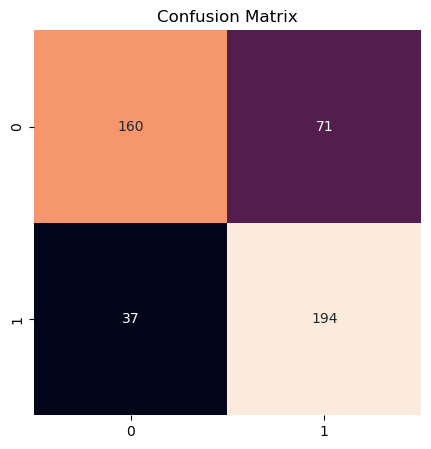

In [32]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_downscale_pred = lr.predict(X_test)

acc_lr_downscale=accuracy_score(y_test, lr_downscale_pred)
print("Accuracy of thie model:\t\t",acc_lr_downscale)
conf_matrix(y_test,lr_downscale_pred)

### RandomForest Classifier

Accuracy of thie model:		 0.7748917748917749


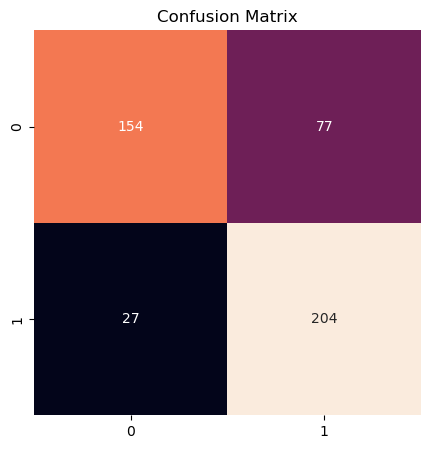

In [33]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
rfc_downscale_pred = rfc.predict(X_test)

acc_rfc_downscale=accuracy_score(y_test, rfc_downscale_pred)
print("Accuracy of thie model:\t\t",acc_rfc_downscale)
conf_matrix(y_test,rfc_downscale_pred)

## Comparing the Various Models

In [34]:
data = {'Model':['Logistic Regression','UpScale Logistic Regression','DownScale Logistic Regression',
                 'RandomForest Classifier','UpScale RandomForest Classifier','DownScale RandomForest Classifier'],
        
        'Accuracy Score':[acc_lr,acc_lr_upscale,acc_lr_downscale,acc_rfc,acc_rfc_upscale,acc_rfc_downscale]}

comparision_table=pd.DataFrame(data)                               
print(comparision_table)

                               Model  Accuracy Score
0                Logistic Regression        0.939818
1        UpScale Logistic Regression        0.741757
2      DownScale Logistic Regression        0.766234
3            RandomForest Classifier        0.938521
4    UpScale RandomForest Classifier        0.986481
5  DownScale RandomForest Classifier        0.774892


## Saving Our Model

In [35]:
# We can now save our random forest model as a pickle file “.pkl” using joblib.
import joblib
joblib.dump(rfc, "auto_claims_fraud.pkl")

['auto_claims_fraud.pkl']

### Deploy our model using fastAPI, Docker and Streamlit

In [36]:
model = joblib.load('auto_claims_fraud.pkl')

In [37]:
from fastapi import FastAPI, File, UploadFile, Response
from fastapi.responses import StreamingResponse, FileResponse
import uvicorn
import joblib
import numpy as np
from pydantic import BaseModel
import io
import pandas as pd
from io import BytesIO, StringIO



app = FastAPI(
    title="Insurance Claims Fraud Detection API",
    description="""An API that utilises a Machine Learning model that detects if a if an insurance claim is fraudulent or not based on the following features: hours, amount, transaction type etc.""",
    version="1.0.0", debug=True)


model = joblib.load('auto_claims_fraud.pkl')

@app.get('/')
def home():
    return {'Title': 'Insurance Claims Fraud Detection API'}


																	
class fraudDetection(BaseModel):
    AccidentArea:object
    PoliceReportFiled:object
    WitnessPresent:object
    AgentType:object
    BasePolicy:object
    FraudFound:int	
   

@app.post('/predict')
def predict(data : fraudDetection):
                                                                                                                                                                                                                                
    features = np.array([[data.AccidentArea, data.PoliceReportFiled, data.WitnessPresent, data.AgentType, data.FraudFound]])
    model = joblib.load('auto_claims_fraud.pkl')

    predictions = model.predict(features)
    if predictions == 1:
        return {"fraudulent"}
    elif predictions == 0:
        return {"valid"}

@app.post("/upload")
async def upload(file: UploadFile = File(...)):
    model = joblib.load('model.pkl')
    contents = await file.file.read()
    buffer = BytesIO(contents)
    df = pd.read_csv(StringIO(str(buffer.file.read(), 'utf-16')), encoding='utf-16')
    buffer.close()
    return df.to_dict(orient='records')